In [31]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel(r"...HARGA RUMAH JAKSEL.xlsx")

# Data Wrangling

In [7]:
print(df.head(5))

         HARGA    LT   LB  JKT  JKM  GRS    KOTA
0  28000000000  1100  700    5    6  ADA  JAKSEL
1  19000000000   824  800    4    4  ADA  JAKSEL
2   4700000000   500  400    4    3  ADA  JAKSEL
3   4900000000   251  300    5    4  ADA  JAKSEL
4  28000000000  1340  575    4    5  ADA  JAKSEL


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   int64 
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(5), object(2)
memory usage: 54.9+ KB


Checking the values of "KOTA"

In [9]:
df['KOTA'].unique()

array(['JAKSEL'], dtype=object)

Since 'Jakarta' is the only value for this column. It can be said that this feature will not play a significant role in our machine learning model. Thus we will drop this column from the dataframe.

In [10]:
df = df.drop(['KOTA'], axis=1)

Next, I am going to check the values of GRS

In [11]:
df['GRS'].unique()

array(['ADA', 'TIDAK ADA'], dtype=object)

Using the map(), I will change the value of 'ADA' into 1 and 'TIDAK ADA' into 0 to make it easier for the machine learning model.

In [12]:
df['GRS'] = df['GRS'].map({'ADA': 1, 'TIDAK ADA': 0})

In [13]:
df.head(5)

,HARGA,LT,LB,JKT,JKM,GRS
0,28000000000,1100,700,5,6,1
1,19000000000,824,800,4,4,1
2,4700000000,500,400,4,3,1
3,4900000000,251,300,5,4,1
4,28000000000,1340,575,4,5,1


In [14]:
df['GRS'].unique()

array([1, 0], dtype=int64)

Lastly, I am going to check if there is any missing data using sns.heatmap()

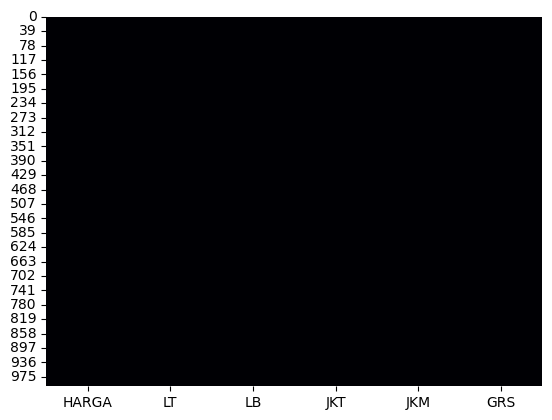

In [15]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

Here I am going to check the relation between each variable using sns.pairplot() function.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   HARGA   1001 non-null   int64
 1   LT      1001 non-null   int64
 2   LB      1001 non-null   int64
 3   JKT     1001 non-null   int64
 4   JKM     1001 non-null   int64
 5   GRS     1001 non-null   int64
dtypes: int64(6)
memory usage: 47.0 KB


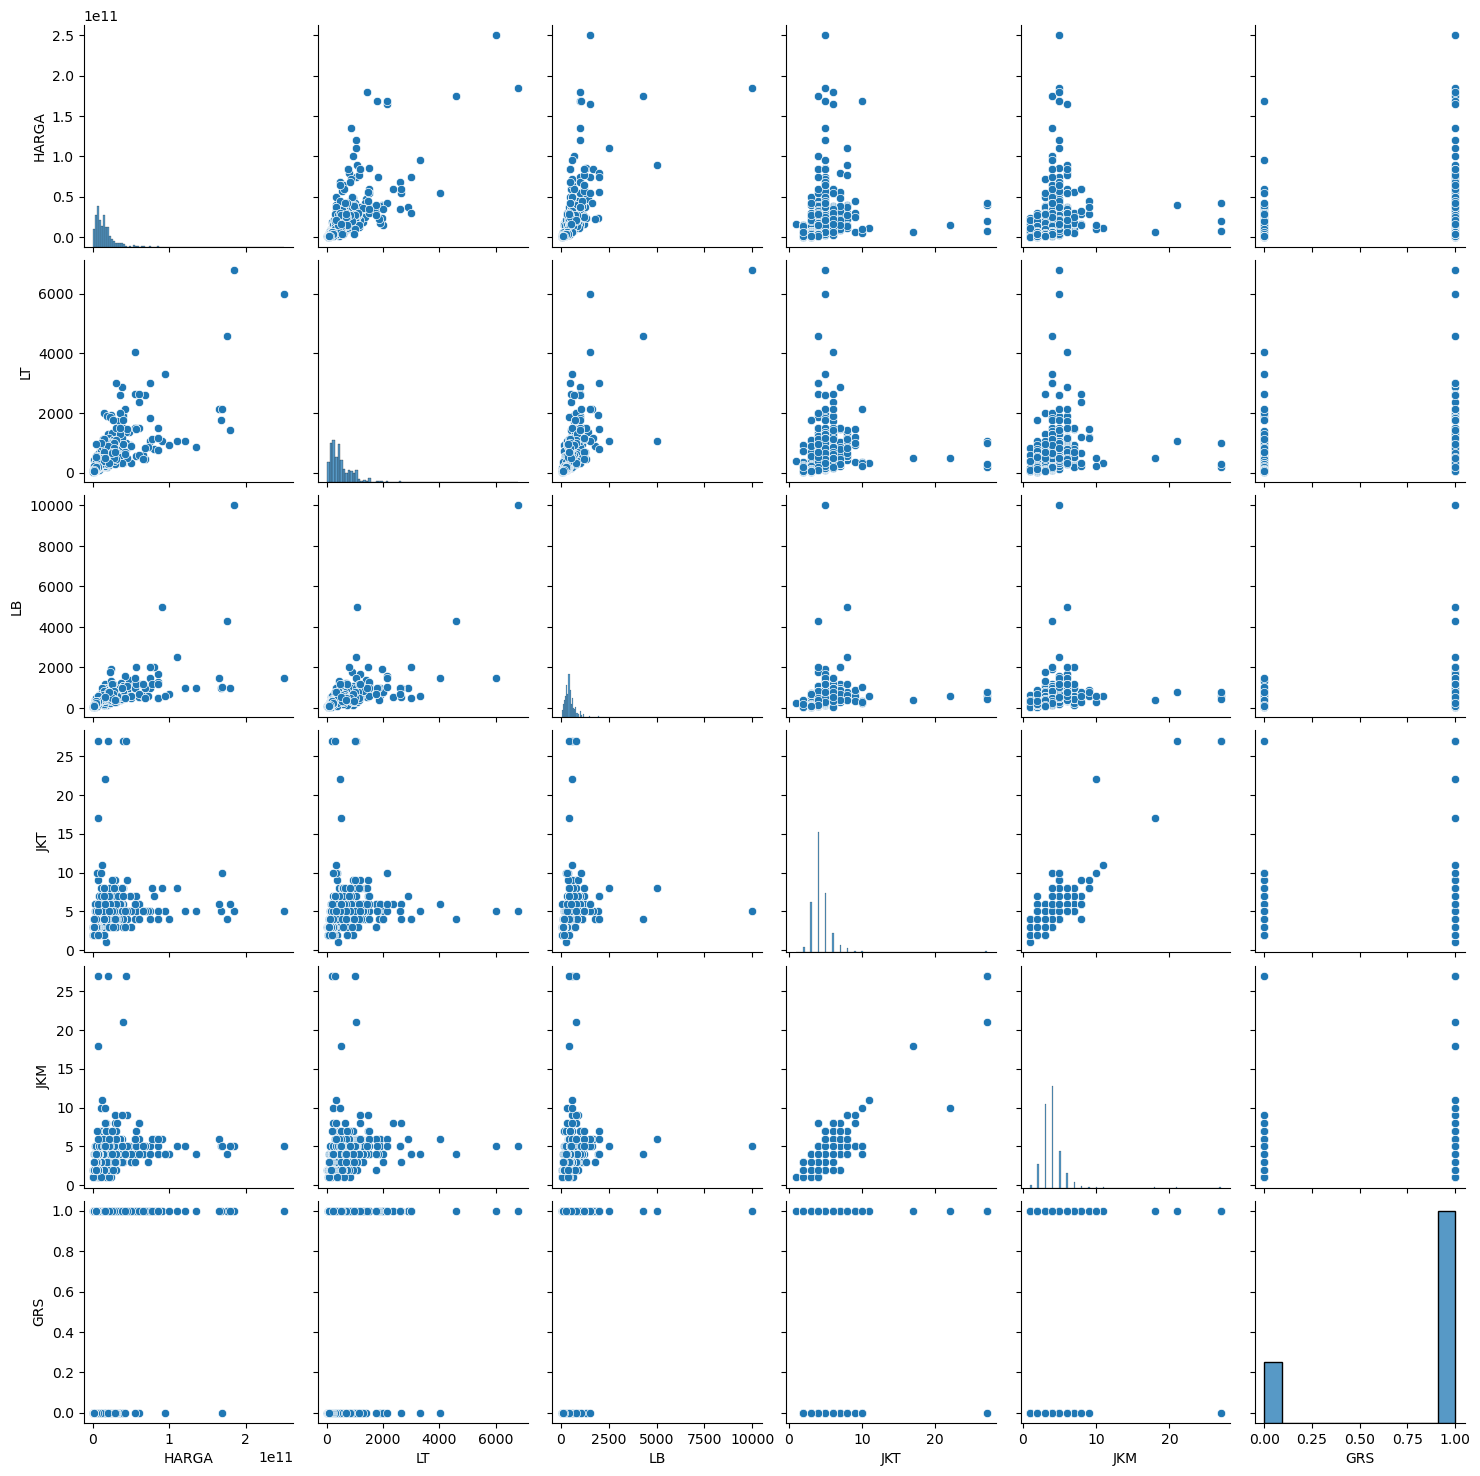

In [17]:
sns.pairplot(df)

Using .corr(), I am going to plot the correlation between each values using seaborn heatmap fucntion.

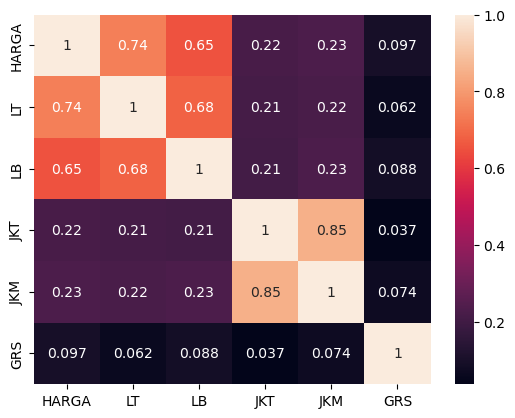

In [18]:
sns.heatmap(df.corr(), annot=True);

Since the relationship is really low, I decided to drop some features (GRS, JKM, and JKT) from the dataset

In [19]:
df = df.drop(['GRS', 'JKM', 'JKT'], axis=1)

Next, I am going to check the distribution of the column 'HARGA' (price)

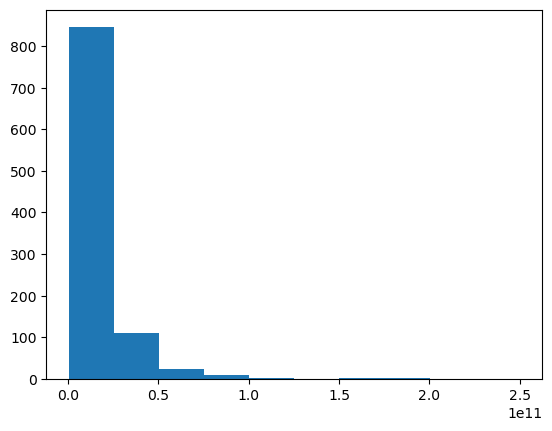

In [20]:
plt.hist(df['HARGA'])
plt.show()

Since there are too many outliers in this column, I decided to delete the outlier using interquantile range (IQR)

In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Remove the outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [22]:
IQR, Q1, Q3

(HARGA    1.325000e+10
 LT       4.570000e+02
 LB       3.000000e+02
 dtype: float64,
 HARGA    6.750000e+09
 LT       2.200000e+02
 LB       3.000000e+02
 Name: 0.25, dtype: float64,
 HARGA    2.000000e+10
 LT       6.770000e+02
 LB       6.000000e+02
 Name: 0.75, dtype: float64)

Checking the distribution after removing the outlier

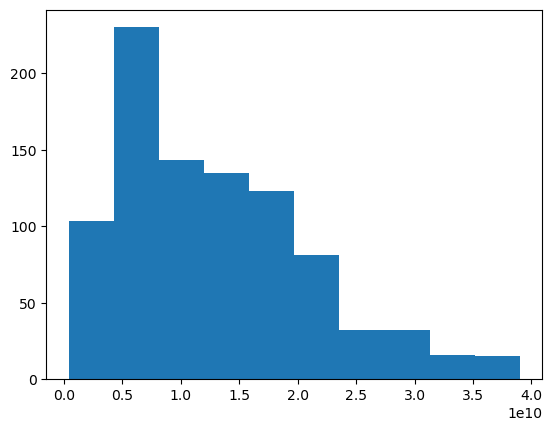

In [23]:
plt.hist(df['HARGA'])
plt.show()

# Preparing the machine learning model

First I am going to prepare X and y values that will be used by the machine learning model

In [24]:
X = df.drop(['HARGA'], axis=1)

In [25]:
y = df['HARGA']

Now we have define the X and y values, I will split the data into training dataset, validation dataset, and test dataset for the Multi-Layer Perceptron Model.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [36]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=10)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [37]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 500}

In [66]:
model = RandomForestRegressor(n_estimators=500, max_depth=20, random_state=42, min_samples_leaf=25, min_samples_split=2)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

In [67]:
mse, r2

(2.1313958452806648e+19, 0.649206017550205)

Here I am going to visualize the accuracy of the machine learning model by plotting the actual values and the residual (which is the actual values substracted by the predicted values). The closer the residuals to 0 the more accurate the machine learning model predict.

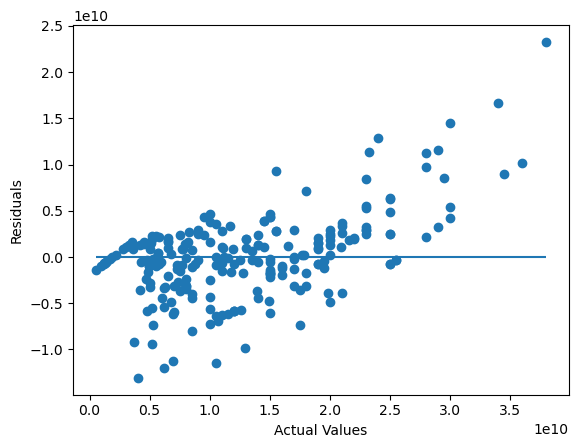

In [68]:
plt.scatter(y_test, y_test - y_pred)
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()